# Tarea 12. K-Medias.
L.E. Rojón

138442


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample 
from sklearn.preprocessing import StandardScaler
import random as rn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.cluster import KMeans 

In [3]:
ab=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',delimiter=',')
ab.head()


,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Divido los datos

In [4]:
X=np.array(ab.iloc[:,1:9])
y=np.array(ab.iloc[:,0])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

Estandarizamos

In [5]:
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)

Hacemos un primer acercamiento con regresión logística y evaluamos el resultado.

In [6]:
rl=LogisticRegression(C=0.01,penalty='l2')
rl.fit(X_train,y_train)
pred=rl.predict(X_test) 
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

             precision    recall  f1-score   support

          F       0.48      0.29      0.36       247
          I       0.62      0.82      0.70       271
          M       0.50      0.51      0.50       318

avg / total       0.53      0.54      0.53       836

[[ 71  47 129]
 [ 14 221  36]
 [ 64  91 163]]


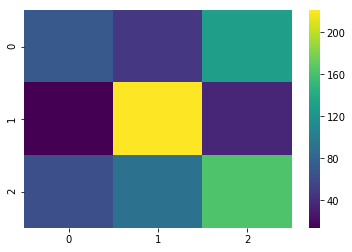

In [8]:
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,cmap='viridis')

Ahora, aplicamos el algoritmo de k-medias para hacer un cúmulo.

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_
clases=kmeans.predict(X)

clas=np.unique(clases)
e=np.column_stack((y,X,clases))

X=e[:,1:10]  
y=e[:,0]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

Entrenamos.

In [10]:
c_train=X_train[:,8]
c_test=X_test[:,8]
X_train=X_train[:,0:8]
X_test=X_test[:,0:8]
scalerx = preprocessing.StandardScaler().fit(X_train)
X_train=scalerx.transform(X_train)
X_test=scalerx.transform(X_test)
X_train

/home/luxorville/virtualenvs/ML/local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.3812389 ,  0.42198989,  0.39733321, ...,  0.07544934,
         0.82381096,  1.24508119],
       [ 0.92147561,  0.92348295,  1.28893993, ...,  1.11733644,
         0.80241088, -0.60248838],
       [ 1.00458895,  0.77303504,  1.92580187, ...,  0.72776126,
         2.82115106,  1.86093771],
       ..., 
       [-1.07324455, -1.1827879 , -1.13113545, ..., -1.02532704,
        -1.15212907, -0.91041664],
       [ 0.46435224,  0.57243781,  0.65207799, ...,  0.25664709,
         0.78814417,  0.3212964 ],
       [ 0.21501222,  0.12109406,  0.39733321, ..., -0.00608966,
        -0.24619267, -0.29456012]])

In [11]:
X_train0,y_train0=X_train[np.where(c_train==0)],y_train[np.where(c_train==0)]
X_train1,y_train1=X_train[np.where(c_train==1)],y_train[np.where(c_train==1)]
X_train2,y_train2=X_train[np.where(c_train==2)],y_train[np.where(c_train==2)]

X_test0,y_test0=X_test[np.where(c_test==0)],y_test[np.where(c_test==0)]
X_test1,y_test1=X_test[np.where(c_test==1)],y_test[np.where(c_test==1)]
X_test2,y_test2=X_test[np.where(c_test==2)],y_test[np.where(c_test==2)]

rl=LogisticRegression(C=0.01,penalty='l2')

rl.fit(X_train0,y_train0)
pred0=rl.predict(X_test0)
rl.fit(X_train1,y_train1)
pred1=rl.predict(X_test1)
rl.fit(X_train2,y_train2)
pred2=rl.predict(X_test2)

yy=np.concatenate((y_test0, y_test1,y_test2), axis=0)
pp=np.concatenate((pred0, pred1,pred2), axis=0)

print(classification_report(yy,pp))
print(confusion_matrix(yy,pp))

             precision    recall  f1-score   support

          F       0.44      0.26      0.33       247
          I       0.66      0.76      0.70       271
          M       0.47      0.56      0.51       318

avg / total       0.52      0.53      0.52       836

[[ 64  36 147]
 [ 12 206  53]
 [ 69  72 177]]


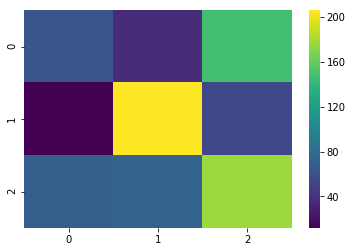

In [12]:
cm=confusion_matrix(yy,pp)
sns.heatmap(cm,cmap='viridis')

Comparando esta matriz de confusión con la inicial, podemos notar que el recall de la categoria M mejora, así como la precisión de la categoría I.